In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r"/Users/claire/Documents/WP/cs185c/project/FPA_FOD_20170508 (1).sqlite")

df = pd.read_sql_query("SELECT b1.temp, b1.dewp, b1.slp, b1.stp, b1.visib, b1.wdsp, b1.mxpsd, b1.gust, b1.max,b1.min, b1.prcp, b1.sndp, b1.fog, b1.rain_drizzle, b1.snow_ice_pellets, b1.hail, b1.thunder, b1.tornado_funnel_cloud, b1.isFire FROM classifed_weather_data b1 LIMIT 4000000; ", conn)

df

,temp,dewp,slp,stp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,isFire
0,79.0,64.4,1013.8,913.4,9.2,4.8,9.9,999.9,89.6,64.4,0.00,999.9,0,0,0,0,0,0,0
1,77.2,69.5,1010.0,909.5,9.0,3.3,7.8,999.9,86.0,66.2,2.26,999.9,0,1,0,0,1,0,0
2,77.8,71.4,1011.0,910.8,8.0,3.6,8.0,999.9,87.1,68.4,0.02,999.9,0,1,0,0,1,0,0
3,77.3,66.7,1008.5,908.2,9.7,4.4,14.0,999.9,86.0,68.0,0.58,999.9,0,1,0,0,1,0,0
4,77.6,69.6,1012.7,911.8,8.7,3.9,8.0,999.9,86.7,66.2,0.33,999.9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,43.8,43.6,1024.2,9999.9,0.0,8.6,13.6,999.9,44.6,42.4,2.31,999.9,1,1,0,0,0,0,0
3999996,44.3,44.2,1023.1,9999.9,0.0,6.9,9.7,999.9,46.4,41.5,0.15,999.9,1,1,0,0,0,0,0
3999997,40.4,37.9,1029.6,9999.9,2.0,9.4,11.7,999.9,45.3,38.3,0.00,999.9,1,1,0,0,0,0,0
3999998,54.2,49.2,1019.5,9999.9,4.8,5.3,9.7,999.9,59.0,48.9,0.02,999.9,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

features = ['temp', 'dewp', 'slp', 'stp', 'visib', 'wdsp', 'mxpsd', 'gust', 'max','min', 'prcp', 'sndp', 'fog', 'rain_drizzle', 'snow_ice_pellets', 'hail', 'thunder', 'tornado_funnel_cloud']

# Separating out the features
x = df.loc[:, features].values

# Separating out the 'isFire' as target
y = df.loc[:,['isFire']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

x

array([[ 1.06312137, -0.25551271, -0.76787995, ..., -0.03243618,
        -0.21976612, -0.00906955],
       [ 0.98495338, -0.25343735, -0.7687555 , ..., -0.03243618,
         4.55029198, -0.00906955],
       [ 1.01100938, -0.25266418, -0.76852509, ..., -0.03243618,
         4.55029198, -0.00906955],
       ...,
       [-0.61314772, -0.26629643, -0.76423953, ..., -0.03243618,
        -0.21976612, -0.00906955],
       [-0.01385981, -0.26169809, -0.76656664, ..., -0.03243618,
        -0.21976612, -0.00906955],
       [ 0.11207751, -0.25962273, -0.76718873, ..., -0.03243618,
        -0.21976612, -0.00906955]])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3' ])

principalDf

,principal component 1,principal component 2,principal component 3
0,-0.423445,-0.035100,-1.427628
1,-1.772898,1.845008,-0.167019
2,-1.758177,1.844395,-0.212511
3,-1.747356,1.837079,-0.188864
4,-0.429268,-0.062254,-1.404340
...,...,...,...
3999995,-0.989016,0.692296,0.831989
3999996,-0.986527,0.687635,0.781782
3999997,-0.970292,0.605215,0.842896
3999998,0.046303,0.123044,-0.625286


In [5]:
finalDf = pd.concat([principalDf, df[['isFire']]], axis = 1)

finalDf

,principal component 1,principal component 2,principal component 3,isFire
0,-0.423445,-0.035100,-1.427628,0
1,-1.772898,1.845008,-0.167019,0
2,-1.758177,1.844395,-0.212511,0
3,-1.747356,1.837079,-0.188864,0
4,-0.429268,-0.062254,-1.404340,0
...,...,...,...,...
3999995,-0.989016,0.692296,0.831989,0
3999996,-0.986527,0.687635,0.781782,0
3999997,-0.970292,0.605215,0.842896,0
3999998,0.046303,0.123044,-0.625286,0


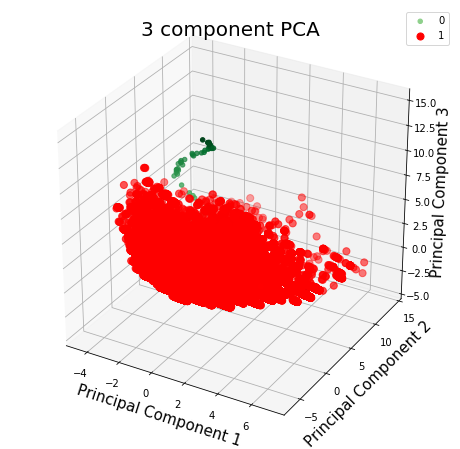

In [14]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')


#  Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for isFire, color in zip(targets,colors):
    indicesToKeep = finalDf['isFire'] == isFire
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               ,finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [15]:
#ells how much information (variance) can be attributed to each of the principal components
pca.explained_variance_ratio_


array([0.13638528, 0.10849639, 0.09866322])